#  Notebook 1 : Analyse exploratoire et préparation des données

**Auteur :** Mehdi MUNIM

**Date :** 2023-10

**Description :**

Ce notebook porte sur l'analyse exploratoire et la préparation des données de tweets pour un projet de classification de sentiment. Il comprend les étapes suivantes :

*   Chargement et aperçu des données
*   Nettoyage des données
*   Analyse exploratoire des données
*   Préparation des données pour l'entraînement
*   Sauvegarde des données prétraitées

**Objectif :**

L'objectif de ce notebook est de préparer les données pour l'entraînement de modèles de Machine Learning qui seront utilisés pour prédire le sentiment (positif ou négatif) de tweets.

---

Git / Colab

---

In [ ]:
#@title Importations

# Librairies pour la manipulation et l'analyse des données
import pandas as pd
import numpy as np

# Librairies pour le traitement du langage naturel (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re  # Importation de re

# Librairies pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Librairies pour le Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  # Importation de TfidfVectorizer

# Librairies pour les embeddings
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

# Librairies pour la sauvegarde des données
import os
import pickle

# Téléchargement des ressources NLTK
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#@title Montage du Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Chargement et aperçu des données

Dans cette section, nous chargeons les données de tweets à partir du fichier CSV `training.1600000.processed.noemoticon.csv`.

**Le jeu de données contient les colonnes suivantes :**

*   Sentiment (0 pour négatif, 4 pour positif)
*   ID du tweet
*   Date du tweet
*   Nom d'utilisateur
*   Texte du tweet

Nous utilisons la librairie pandas pour lire le fichier CSV et afficher les premières lignes du DataFrame, les noms de colonnes, les types de données et les statistiques descriptives. Cela nous permet de vérifier que les données ont été chargées correctement et d'avoir un premier aperçu de leur structure et de leur contenu.

In [ ]:
#@title Chargement et aperçu des données

# Téléchargement et décompression du fichier zip
!wget "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+7%C2%A0-+D%C3%A9tectez+les+Bad+Buzz+gr%C3%A2ce+au+Deep+Learning/sentiment140.zip"
!unzip sentiment140.zip

# Chargement des données du fichier CSV
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

# Affichage des premières lignes du DataFrame
print("Premières lignes du DataFrame :")
display(df.head())

# Affichage des noms de colonnes
print("\nNoms de colonnes :")
print(df.columns)

# Affichage des types de données et des informations manquantes
print("\nInformations sur le DataFrame :")
df.info()

# Affichage des statistiques descriptives
print("\nStatistiques descriptives :")
display(df.describe())

--2024-11-18 07:55:00--  https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+7%C2%A0-+D%C3%A9tectez+les+Bad+Buzz+gr%C3%A2ce+au+Deep+Learning/sentiment140.zip
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.0.155, 3.5.64.109, 52.218.44.40, ...
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84855679 (81M) [application/zip]
Saving to: ‘sentiment140.zip’

sentiment140.zip    100%[===================>]  80.92M  18.0MB/s    in 4.5s    

2024-11-18 07:55:05 (18.0 MB/s) - ‘sentiment140.zip’ saved [84855679/84855679]

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  
Premières lignes du DataFrame :


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."



Noms de colonnes :
Index([0, 1, 2, 3, 4, 5], dtype='int64')

Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB

Statistiques descriptives :


,0,1
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


## 2. Nettoyage des données

Dans cette section, nous effectuons un nettoyage des données textuelles des tweets afin de les préparer à l'analyse et à la modélisation. Ce nettoyage comprend les étapes suivantes :

*   **Suppression des éléments non pertinents**:  Nous supprimons les mentions (@utilisateur), les hashtags (#mot-clé) et les liens (URL) car ils n'apportent généralement pas d'information utile pour l'analyse de sentiment.
*   **Suppression des caractères spéciaux et de la ponctuation**:  Nous supprimons tous les caractères qui ne sont pas des lettres ou des espaces.
*   **Conversion en minuscules**:  Nous convertissons tout le texte en minuscules pour uniformiser les données et éviter que les mêmes mots soient traités différemment en fonction de leur casse.
*   **Suppression des mots vides (stop words)**:  Nous supprimons les mots très fréquents ("the", "a", "is", etc.) qui n'apportent pas de sens particulier à l'analyse.
*   **Lemmatisation**:  Nous réduisons les mots à leur forme canonique (lemme) pour regrouper les différentes formes fléchies d'un même mot (ex: "running" devient "run").

Ce nettoyage permet de réduire le bruit dans les données et de se concentrer sur les mots les plus importants pour l'analyse de sentiment.

---

<10min

---

In [ ]:
#@title Nettoyage des données

# Fonction pour nettoyer le texte d'un tweet
def clean_tweet(tweet):
    # Supprimer les mentions, les hashtags et les liens
    tweet = re.sub(r"@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|http\S+", "", tweet)
    # Supprimer les caractères spéciaux et la ponctuation
    tweet = re.sub(r"[^a-zA-Z ]", "", tweet)
    # Convertir le texte en minuscules
    tweet = tweet.lower()
    # Supprimer les mots vides
    stop_words = set(stopwords.words('english'))
    tweet = " ".join([word for word in tweet.split() if word not in stop_words])
    # Lemmatiser les mots
    lemmatizer = WordNetLemmatizer()
    tweet = " ".join([lemmatizer.lemmatize(word) for word in tweet.split()])
    return tweet

# Appliquer la fonction de nettoyage à la colonne des tweets
df[5] = df[5].apply(clean_tweet)

# Affichage des premières lignes du DataFrame avec les tweets nettoyés
print("Premières lignes du DataFrame avec les tweets nettoyés :")
display(df.head())

Premières lignes du DataFrame avec les tweets nettoyés :


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww thats bummer shoulda got david carr third...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many time ball managed save rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving im mad cant see


## 3. Analyse exploratoire

Dans cette section, nous réalisons une analyse exploratoire des données pour mieux comprendre les caractéristiques des tweets et identifier des tendances ou des informations importantes.

**Les analyses effectuées comprennent :**

*   **Distribution des sentiments**: Nous visualisons la distribution des sentiments (positif et négatif) dans le jeu de données pour identifier si les classes sont équilibrées ou non.
*   **Fréquence des mots**: Nous calculons la fréquence des mots les plus utilisés dans les tweets pour identifier les termes les plus importants et ceux qui pourraient être caractéristiques de chaque sentiment.
*   **Nuage de mots**: Nous générons un nuage de mots pour visualiser les mots les plus fréquents de manière plus intuitive et identifier rapidement les termes les plus importants.

Ces analyses nous aident à mieux comprendre les données et à formuler des hypothèses sur les facteurs qui influencent le sentiment exprimé dans les tweets.

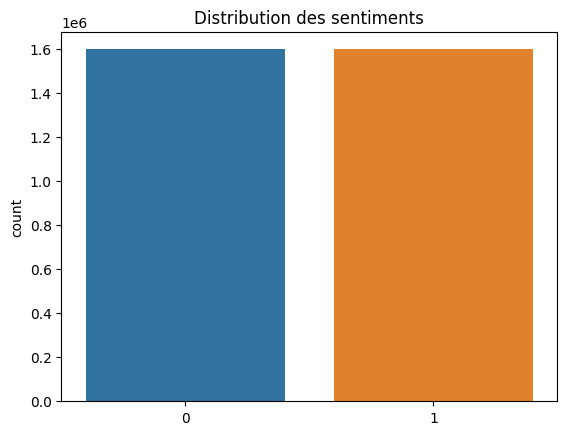

20 mots les plus fréquents :
[('im', 178400), ('day', 104580), ('good', 89529), ('get', 85933), ('like', 79096), ('go', 77445), ('u', 67382), ('dont', 67304), ('love', 66955), ('work', 66485), ('today', 66118), ('going', 64104), ('time', 63801), ('cant', 62900), ('got', 60903), ('back', 56121), ('one', 55883), ('lol', 55208), ('know', 53228), ('really', 49564)]


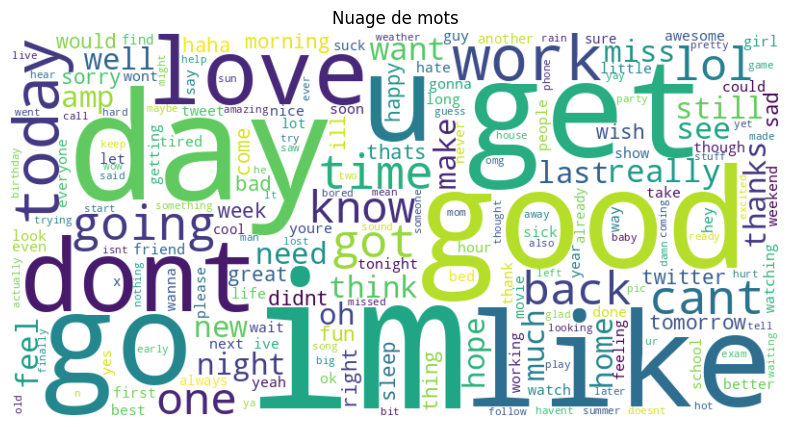

In [ ]:
#@title Analyse exploratoire

# Analyse de la distribution des sentiments
sns.countplot(data=df)
plt.title('Distribution des sentiments')
plt.show()

# Calcul de la fréquence des mots
from collections import Counter

all_words = ' '.join(df[5].tolist()).split()
word_counts = Counter(all_words)

# Affichage des 20 mots les plus fréquents
print("20 mots les plus fréquents :")
print(word_counts.most_common(20))

# Création d'un nuage de mots
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots')
plt.show()

## 4. Préparation des données pour l'entraînement

Dans cette section, nous allons préparer les données pour l'entraînement des modèles de Machine Learning.

Cela comprend les étapes suivantes :

1.  **Encodage des labels** : Convertir les labels de sentiment (0 pour négatif, 4 pour positif) en valeurs numériques (0 et 1).
2.  **Division des données** : Diviser les données en ensembles d'entraînement et de test.
3.  **Vectorisation du texte** : Transformer le texte des tweets en représentations numériques (vecteurs) en utilisant différentes techniques d'embedding.
    *   TF-IDF
    *   Word2Vec
    *   Doc2Vec
4.  **Sauvegarde des données** : Enregistrer les données vectorisées pour chaque technique d'embedding.

In [ ]:
#@title Encodage des labels

# Encodage des labels de sentiment (0 et 4) en valeurs numériques (0 et 1)
df[0] = df[0].map({0: 0, 4: 1})

In [ ]:
#@title Division des données

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df[5], df[0], test_size=0.2, random_state=42)

### Vectorisation avec TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) est une technique de vectorisation qui pondère l'importance des mots en fonction de leur fréquence dans le document et dans l'ensemble du corpus.

---

t < 1min

---

In [ ]:
#@title Vectorisation TF-IDF

# Vectorisation du texte des tweets avec TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

### Vectorisation avec Word2Vec

Word2Vec est un algorithme qui permet d'apprendre des représentations vectorielles (embeddings) de mots à partir d'un corpus de texte. Chaque mot est représenté par un vecteur dense qui capture sa signification sémantique.

---

t < 5min

---

In [ ]:
#@title Vectorisation Word2Vec

# Entraînement du modèle Word2Vec sur les tweets prétraités
sentences = [tweet.split() for tweet in X_train]
model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Fonction pour vectoriser un tweet en utilisant la moyenne des embeddings Word2Vec
def vectorize_tweet_w2v(tweet):
    vectors = [model_w2v.wv[word] for word in tweet.split() if word in model_w2v.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model_w2v.vector_size)

# Vectorisation des données d'entraînement et de test
X_train_w2v = np.array([vectorize_tweet_w2v(tweet) for tweet in X_train])
X_test_w2v = np.array([vectorize_tweet_w2v(tweet) for tweet in X_test])

### Vectorisation avec Doc2Vec

Doc2Vec est une extension de Word2Vec qui permet d'apprendre des représentations vectorielles (embeddings) de documents entiers, en plus des mots.

---


t < 30min

---

In [ ]:
#@title Vectorisation Doc2Vec

# Préparation des données pour Doc2Vec
documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(X_train)]

# Entraînement du modèle Doc2Vec
model_d2v = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=4)

# Fonction pour vectoriser un tweet en utilisant l'embedding Doc2Vec
def vectorize_tweet_d2v(tweet):
    return model_d2v.infer_vector(tweet.split())

# Vectorisation des données d'entraînement et de test
X_train_d2v = np.array([vectorize_tweet_d2v(tweet) for tweet in X_train])
X_test_d2v = np.array([vectorize_tweet_d2v(tweet) for tweet in X_test])

In [ ]:
#@title Sauvegarde des données

# Chemin d'accès au dossier sur le Drive
drive_path = "/content/drive/My Drive/OC/OC7/"

# Création du dossier "data" s'il n'existe pas
os.makedirs(drive_path + "data", exist_ok=True)

# Sauvegarde des données pour chaque méthode
def save_data(X_train, X_test, method):
    method_path = os.path.join(drive_path, "data", method)
    os.makedirs(method_path, exist_ok=True)
    with open(os.path.join(method_path, 'X_train.pickle'), 'wb') as f:
        pickle.dump(X_train, f)
    with open(os.path.join(method_path, 'X_test.pickle'), 'wb') as f:
        pickle.dump(X_test, f)

save_data(X_train_tfidf, X_test_tfidf, "tfidf")
save_data(X_train_w2v, X_test_w2v, "word2vec")
save_data(X_train_d2v, X_test_d2v, "doc2vec")


# Sauvegarde de y_train et y_test dans le dossier principal "data"
with open(os.path.join(drive_path, "data", 'y_train.pickle'), 'wb') as f:
    pickle.dump(y_train, f)

with open(os.path.join(drive_path, "data", 'y_test.pickle'), 'wb') as f:
    pickle.dump(y_test, f)